In [ ]:
from google.colab import drive
drive._mount('/content/drive')

In [1]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [2]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgpm2:amd64.
(Reading database ... 155519 files and directories currently installed.)
Preparing to unpack .../libgpm2_1.20.7-5_amd64.deb ...
Unpacking libgpm2:amd64 (1.20.7-5) ...
Selecting previously unselected package w3m.
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up libgpm2:amd64 (1.20.7-5) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/

In [3]:
!pip install vit-keras
!pip install tensorflow-addons

In [1]:
!git clone https://github.com/rishigami/Swin-Transformer-TF.git

Cloning into 'Swin-Transformer-TF'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 44 (delta 15), reused 7 (delta 7), pack-reused 26
Unpacking objects: 100% (44/44), done.


In [2]:
import tensorflow as tf
import os
import sys
sys.path.append('/content/Swin-Transformer-TF')
from swintransformer import SwinTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
#from vit_keras import vit, utils, visualize

In [4]:
import cv2
from vit_keras import vit, utils, visualize

In [5]:
data_dir = '/content/drive/MyDrive/Datasets/Dataset_BUSI_with_GT'
normal_path = os.path.join(data_dir, 'normal')
benign_path = os.path.join(data_dir, 'benign')
malignant_path = os.path.join(data_dir, 'malignant')

In [6]:
def get_mat_from_images(path, tag, sizex, sizey):
  images = np.sort(os.listdir(path))
  mat = []
  for image in images:
    if image.endswith(').png'):
      #print(image)
      image_data = cv2.resize(cv2.imread(os.path.join(path, image), 0), (sizex, sizey))
      image_data = np.float32(image_data)
      mat.append(image_data)
      #print(image_data.shape)
      #print(image_data.dtype)

  print(f'shape of the {tag} is {np.array(mat).shape}')
  return np.array(mat)

In [7]:
sizex, sizey = 224, 224
normal_mat = get_mat_from_images(normal_path, 'normal', sizex, sizey)
benign_mat = get_mat_from_images(benign_path, 'benign', sizex, sizey)
malignant_mat = get_mat_from_images(malignant_path, 'malignant', sizex, sizey)

shape of the normal is (133, 224, 224)
shape of the benign is (437, 224, 224)
shape of the malignant is (210, 224, 224)


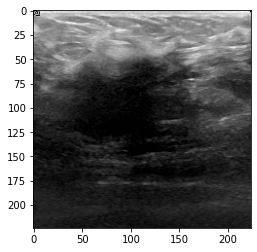

In [8]:
plt.imshow(np.squeeze(malignant_mat[179, :, :]), cmap = 'gray')
plt.show()

In [9]:
normal_labels = np.zeros(np.shape(normal_mat)[0])
benign_labels = np.ones(np.shape(benign_mat)[0])
malignant_labels = 2 * np.ones(np.shape(malignant_mat)[0])

In [10]:
# all data
X = np.concatenate((normal_mat, benign_mat, malignant_mat))
#X = np.expand_dims(X, axis = -1)
X = np.repeat(X[..., np.newaxis], 3, -1)
y = np.concatenate((normal_labels, benign_labels, malignant_labels))
print(X.shape, y.shape)
print(np.min(X), np.max(X)) # data is already scaled between 0 and 255

(780, 224, 224, 3) (780,)
0.0 255.0


In [11]:
X = vit.preprocess_inputs(X)
print(np.min(X))
print(np.max(X))

-1.0
1.0


In [12]:
resolution = X.shape[1]

In [79]:
IMAGE_SIZE = [resolution, resolution, 3]
NUM_CLASSES = 3

swin_vit = SwinTransformer('swin_large_224', include_top=False, pretrained=True)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = IMAGE_SIZE))
model.add(swin_vit)
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))

model.build(IMAGE_SIZE)

722608128/722592300 [==============================] - 52s 0us/step


In [80]:
#model.build(IMAGE_SIZE)
model.summary()

model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 swin_large_224 (SwinTransfo  (None, 1536)             195331616 
 rmerModel)                                                      
                                                                 
 dense_6 (Dense)             (None, 3)                 4611      
                                                                 
Total params: 195,336,227
Trainable params: 195,000,087
Non-trainable params: 336,140
_________________________________________________________________


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#print(f'{y_train}')

#print(f'{y_test}')

In [82]:
model.fit(x_train, y_train, batch_size = 8, epochs = 20, validation_split = 0.10)

Epoch 1/20
71/71 [==============================] - 58s 820ms/step - loss: 0.8203 - accuracy: 0.6310 - val_loss: 1.9210 - val_accuracy: 0.2698
Epoch 2/20
71/71 [==============================] - 55s 770ms/step - loss: 0.5102 - accuracy: 0.7754 - val_loss: 0.7720 - val_accuracy: 0.6508
Epoch 3/20
71/71 [==============================] - 56s 784ms/step - loss: 0.2541 - accuracy: 0.9162 - val_loss: 0.7467 - val_accuracy: 0.7937
Epoch 4/20
71/71 [==============================] - 56s 788ms/step - loss: 0.1665 - accuracy: 0.9447 - val_loss: 0.3928 - val_accuracy: 0.8889
Epoch 5/20
71/71 [==============================] - 56s 793ms/step - loss: 0.0970 - accuracy: 0.9679 - val_loss: 0.4743 - val_accuracy: 0.8413
Epoch 6/20
71/71 [==============================] - 56s 794ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.3976 - val_accuracy: 0.8730
Epoch 7/20
71/71 [==============================] - 57s 797ms/step - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.4717 - val_accuracy: 0.8889

In [83]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 5s 916ms/step - loss: 0.7057 - accuracy: 0.8974


[0.7056519389152527, 0.8974359035491943]

In [84]:
y_pred = model.predict(x_test)

In [85]:
y_prob = np.argmax(y_pred, axis = 1)

In [38]:
import sklearn

In [86]:
print(f'Accuracy {sklearn.metrics.accuracy_score(y_test, y_prob)}')
AUC = sklearn.metrics.roc_auc_score(y_test, y_pred, multi_class='ovo')
print(f'AUC is {AUC}')
target_names = ['normal', 'benign', 'malignant']
print('F1-score', sklearn.metrics.f1_score(y_test, y_prob, average = 'micro'))
print(f'Balanced accuracy {sklearn.metrics.balanced_accuracy_score(y_test, y_prob)}')
print(f'MCC {sklearn.metrics.matthews_corrcoef(y_test, y_prob)}')
print(f'{sklearn.metrics.classification_report(y_test, y_prob, target_names=target_names)}')

Accuracy 0.8974358974358975
AUC is 0.96770911360799
F1-score 0.8974358974358975
Balanced accuracy 0.8747957909755663
MCC 0.8219225228600209
              precision    recall  f1-score   support

      normal       0.96      0.92      0.94        25
      benign       0.87      0.97      0.91        89
   malignant       0.94      0.74      0.83        42

    accuracy                           0.90       156
   macro avg       0.92      0.87      0.89       156
weighted avg       0.90      0.90      0.89       156

